In these exercises, you will complete the first step toward the above goal: acquire and prepare the necessary Zillow data from the zillow database in the Codeup database server.

1. Acquire `bedroomcnt`, `bathroomcnt`, `calculatedfinishedsquarefeet`, `taxvaluedollarcnt`, `yearbuilt`, `taxamount`, and `fips` from the `zillow` database for all 'Single Family Residential' properties.
1. Using your acquired Zillow data, walk through the summarization and cleaning steps in your `wrangle.ipynb` file like we did above. You may handle the missing values however you feel is appropriate and meaninful; remember to document your process and decisions using markdown and code commenting where helpful.
1. Store all of the necessary functions to automate your process from acquiring the data to returning a cleaned dataframe witn no missing values in your `wrangle.py` file. Name your final function `wrangle_zillow`.

In [1]:
# Importing libraies into notebook

import pandas as pd
import numpy as np
import os
import seaborn as sns


In [2]:
# importing py files into notebook
import env
from env import host, user, password
from env import get_db_url


In [3]:
sql_query = """
                SELECT bedroomcnt, bathroomcnt, calculatedfinishedsquarefeet, taxvaluedollarcnt, yearbuilt, taxamount, fips
                from properties_2017
                join propertylandusetype using (propertylandusetypeid)
                join  architecturalstyletype using (architecturalstyletypeid)
                where	propertylandusetypeid = '261'
            """

In [27]:
 # Read in DataFrame from Codeup db.
df = pd.read_sql(sql_query, get_db_url('zillow'))

In [28]:
df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,2.0,2.0,1181.0,294408.0,1978.0,3471.94,6059.0
1,4.0,4.0,2686.0,336887.0,1977.0,3935.44,6059.0
2,4.0,2.0,1348.0,184764.0,1964.0,2363.48,6059.0
3,3.0,1.5,1122.0,342293.0,1963.0,4025.66,6059.0
4,3.0,2.0,1357.0,79871.0,1974.0,1532.64,6059.0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2393 entries, 0 to 2392
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   bedroomcnt                    2393 non-null   float64
 1   bathroomcnt                   2393 non-null   float64
 2   calculatedfinishedsquarefeet  2393 non-null   float64
 3   taxvaluedollarcnt             2393 non-null   float64
 4   yearbuilt                     2393 non-null   float64
 5   taxamount                     2393 non-null   float64
 6   fips                          2393 non-null   float64
dtypes: float64(7)
memory usage: 131.0 KB


**Takeaways**
- no null values
- convert columns `fips`, `bedroomcnt` and `yearbuilt` into int64. they are whole values

In [10]:
df = df.astype({'fips': 'int64', 'yearbuilt': 'int64', 'bedroomcnt': 'int64'})

In [11]:
df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,2,2.0,1181.0,294408.0,1978,3471.94,6059
1,4,4.0,2686.0,336887.0,1977,3935.44,6059
2,4,2.0,1348.0,184764.0,1964,2363.48,6059
3,3,1.5,1122.0,342293.0,1963,4025.66,6059
4,3,2.0,1357.0,79871.0,1974,1532.64,6059


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2393 entries, 0 to 2392
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   bedroomcnt                    2393 non-null   int64  
 1   bathroomcnt                   2393 non-null   float64
 2   calculatedfinishedsquarefeet  2393 non-null   float64
 3   taxvaluedollarcnt             2393 non-null   float64
 4   yearbuilt                     2393 non-null   int64  
 5   taxamount                     2393 non-null   float64
 6   fips                          2393 non-null   int64  
dtypes: float64(4), int64(3)
memory usage: 131.0 KB


In [14]:
from wrangle import wrangle_zillow

In [15]:
df

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,2,2.0,1181.0,294408.0,1978,3471.94,6059
1,4,4.0,2686.0,336887.0,1977,3935.44,6059
2,4,2.0,1348.0,184764.0,1964,2363.48,6059
3,3,1.5,1122.0,342293.0,1963,4025.66,6059
4,3,2.0,1357.0,79871.0,1974,1532.64,6059
...,...,...,...,...,...,...,...
2388,2,1.5,960.0,194173.0,1964,2484.70,6059
2389,3,2.5,1302.0,114409.0,1973,1641.66,6059
2390,2,1.5,1366.0,299498.0,1977,3180.40,6059
2391,4,2.0,1428.0,218677.0,1972,2236.38,6059


In [26]:
# testing acquiring raw data function
tc = wrangle.new_familyhome_data()
tc.head(2)

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,2.0,2.0,1181.0,294408.0,1978.0,3471.94,6059.0
1,4.0,4.0,2686.0,336887.0,1977.0,3935.44,6059.0


<AxesSubplot:>

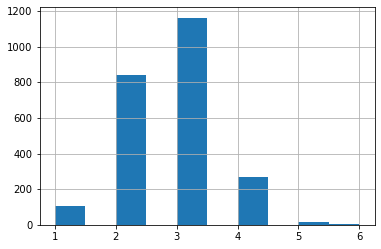

In [29]:
df.bedroomcnt.hist()

<AxesSubplot:>

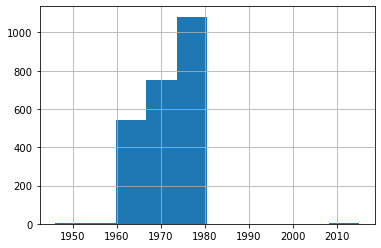

In [30]:
df.yearbuilt.hist()

<AxesSubplot:>

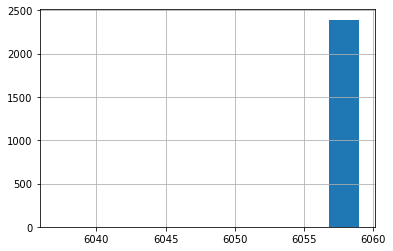

In [31]:
df.fips.hist()

<AxesSubplot:>

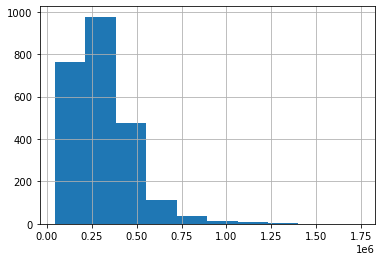

In [32]:
df.taxvaluedollarcnt.hist()

In [34]:
df.calculatedfinishedsquarefeet.sort_values(ascending=False)

1375    3016.0
1983    2838.0
656     2775.0
1712    2694.0
2177    2692.0
         ...  
1231     550.0
676      550.0
1379     550.0
762      550.0
2086     550.0
Name: calculatedfinishedsquarefeet, Length: 2393, dtype: float64

In [35]:
df.bedroomcnt.value_counts()

3.0    1163
2.0     840
4.0     271
1.0     103
5.0      14
6.0       2
Name: bedroomcnt, dtype: int64

In [36]:
df.bathroomcnt.value_counts()

2.5    809
2.0    762
1.5    518
1.0    180
3.0    101
3.5     20
4.0      3
Name: bathroomcnt, dtype: int64

In [37]:
df.taxvaluedollarcnt.value_counts()

207000.0    7
482243.0    5
381640.0    5
288956.0    4
393502.0    4
           ..
192504.0    1
212207.0    1
266625.0    1
138321.0    1
156610.0    1
Name: taxvaluedollarcnt, Length: 2109, dtype: int64

In [38]:
df.fips.value_counts()

6059.0    2392
6037.0       1
Name: fips, dtype: int64

<AxesSubplot:>

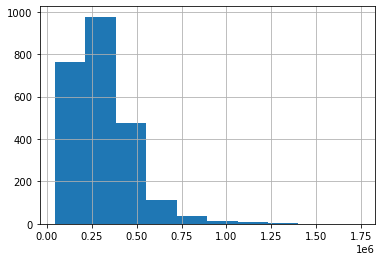

In [39]:
df.taxvaluedollarcnt.hist()